**1. Import Library yang akan digunakan**

In [34]:
import os #paths to file
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings# warning filter
import datetime as dt #for timestamp
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

**2. Mengambil Data**

In [35]:
#Menautkan Google Drive dengan Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
#Path dari masing_masing data di google drive

build_path = "/content/drive/MyDrive/ProjectUTSEVDA/building_metadata.csv" 
enTrain_path = "/content/drive/MyDrive/ProjectUTSEVDA/train.csv"
wtTrain_path = "/content/drive/MyDrive/ProjectUTSEVDA/weather_train.csv"
enTest_path = "/content/drive/MyDrive/ProjectUTSEVDA/test.csv"
wtTest_path = "/content/drive/MyDrive/ProjectUTSEVDA/weather_test.csv"

In [37]:
#Mount data dengan Pandas

df_build = pd.read_csv(build_path) #Dataframe Building_Metadata
df_enTrain = pd.read_csv(enTrain_path) #Dataframe train
df_wtTrain = pd.read_csv(wtTrain_path) #Dataframe weather train
df_enTest = pd.read_csv(enTest_path) #Dataframe test
df_wtTest = pd.read_csv(wtTest_path) #Dataframe weather test

**3. Melihat informasi dari tiap data**

Data yang terdapat pada tiap file csv

**building_metadata.csv:** Metadata untuk semua bangunan di berbagai tempat. didalam file tersebut berisi:

* site_id — ID untuk file cuaca.
* building_id — ID untuk training.csv
* primary_use — Indikator kategori utama aktivitas untuk bangunan berdasarkan definisi tipe properti EnergyStar
* square_feet — Luas lantai kotor bangunan
* year_built — Tahun bangunan dibuka
* floor_count — Jumlah lantai bangunan

**train.csv/test.csv:** Berisi id bangunan, id meter, catatan waktu saat pengukuran meteran dilakukan dan pembacaan meter yang merupakan variabel target.

* building_id — ID untuk metadata bangunan.
* meter — Kode id meter. Dibaca sebagai {0: listrik, 1: air dingin, 2: uap, 3: air panas}. Tidak setiap bangunan memiliki semua jenis id meteran.
* timestamp — Saat pengukuran dilakukan
* meter_reading — Variabel target. Konsumsi energi dalam kWh (atau setara)

**weather_train.csv/weather_test.csv:** Data cuaca dari stasiun metrologi yang terdekat dengan lokasi.

* site_id- id lokasi bangunan
* air_temperature — Derajat Celcius
* cloud_coverage — Bagian dari langit yang tertutup awan, dalam oktas
* dew_temperature — Derajat Celcius
* precip_depth_1_hr — Milimeter
* sea_level_pressure — Milibar/hectopascals
* wind_direction — Arah kompas (0–360)
* wind_speed — Meter per detik

In [38]:
# Informasi dari data Metadata Bangunan (df_build)

df_build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1449 entries, 0 to 1448
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   site_id      1449 non-null   int64  
 1   building_id  1449 non-null   int64  
 2   primary_use  1449 non-null   object 
 3   square_feet  1449 non-null   int64  
 4   year_built   675 non-null    float64
 5   floor_count  355 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 68.0+ KB


In [39]:
# Statistika Dasar dari Data Metadata Bangunan

df_build.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site_id,1449.0,6.952381,5.003432,0.0,3.0,5.0,13.0,15.0
building_id,1449.0,724.000000,418.434583,0.0,362.0,724.0,1086.0,1448.0
square_feet,1449.0,92111.776398,110769.950997,283.0,23012.0,57673.0,115676.0,875000.0
year_built,675.0,1967.957037,31.054030,1900.0,1949.0,1970.0,1995.0,2017.0
floor_count,355.0,3.740845,3.333683,1.0,1.0,3.0,5.0,26.0


In [40]:
# Menampilkan 5 Data Awal Metadata Bangunan

df_build.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


In [41]:
# Check Null Values pada Data Metadata Bangunan

df_build.isnull().sum()

site_id           0
building_id       0
primary_use       0
square_feet       0
year_built      774
floor_count    1094
dtype: int64

In [42]:
# Informasi dari data Train (df_enTrain)

df_enTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
 #   Column         Dtype  
---  ------         -----  
 0   building_id    int64  
 1   meter          int64  
 2   timestamp      object 
 3   meter_reading  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB


In [43]:
# Statistika Dasar dari Data Train

df_enTrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
building_id,20216100.0,799.278000,426.913309,0.0,393.0,895.000,1179.000,1448.0
meter,20216100.0,0.662441,0.930992,0.0,0.0,0.000,1.000,3.0
meter_reading,20216100.0,2117.121076,153235.624995,0.0,18.3,78.775,267.984,21904700.0


In [44]:
# Menampilkan 5 Data Awal dari Data Train

df_enTrain.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [45]:
# Check Null Values pada Data Train

df_enTrain.isnull().sum()

building_id      0
meter            0
timestamp        0
meter_reading    0
dtype: int64

In [46]:
# Informasi dari Data Cuaca Train (df_wtTrain)

df_wtTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   site_id             139773 non-null  int64  
 1   timestamp           139773 non-null  object 
 2   air_temperature     139718 non-null  float64
 3   cloud_coverage      70600 non-null   float64
 4   dew_temperature     139660 non-null  float64
 5   precip_depth_1_hr   89484 non-null   float64
 6   sea_level_pressure  129155 non-null  float64
 7   wind_direction      133505 non-null  float64
 8   wind_speed          139469 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 9.6+ MB


In [47]:
# Statitistika Dasar dari Data Cuaca Train

df_wtTrain.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
site_id,139773.0,7.478977,4.604744,0.0,3.0,7.0,11.0,15.0
air_temperature,139718.0,14.418106,10.626595,-28.9,7.2,15.0,22.2,47.2
cloud_coverage,70600.0,2.149306,2.599150,0.0,0.0,2.0,4.0,9.0
dew_temperature,139660.0,7.350158,9.790235,-35.0,0.6,8.3,14.4,26.1
precip_depth_1_hr,89484.0,0.983047,8.463678,-1.0,0.0,0.0,0.0,343.0
sea_level_pressure,129155.0,1016.158038,7.629684,968.2,1011.8,1016.4,1020.8,1045.5
wind_direction,133505.0,180.526632,111.523629,0.0,80.0,190.0,280.0,360.0
wind_speed,139469.0,3.560527,2.335874,0.0,2.1,3.1,5.0,19.0


In [48]:
# Menampilkan 5 Data Awal dari Data Cuaca Train

df_wtTrain.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [49]:
# Check Null Values pada Data Cuaca Train

df_wtTrain.isnull().sum()

site_id                   0
timestamp                 0
air_temperature          55
cloud_coverage        69173
dew_temperature         113
precip_depth_1_hr     50289
sea_level_pressure    10618
wind_direction         6268
wind_speed              304
dtype: int64

**4. Membuat data lebih ringan dan  mengurangi pembacaan memory**

In [51]:
# Mengubah data menjadi format lebih ringan karena beberapa kerangka data terlalu besar dan membutuhkan waktu lama untuk dimuat

%%time
df_build.to_feather('df_build.feather')

df_enTrain.to_feather('df_enTrain.feather')
df_enTest.to_feather('df_enTest.feather')

df_wtTrain.to_feather('df_wtTrain.feather')
df_wtTest.to_feather('df_wtTest.feather')

CPU times: user 4.55 s, sys: 1.6 s, total: 6.15 s
Wall time: 5.87 s


In [52]:
# Fungsi ini membantu dalam mengoptimalkan memori yang digunakan oleh kerangka data dengan memodifikasi/mengubah tipe data setiap kolom.

def reduce_mem_usage(df, df_name):

    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:

        col_type = df[col].dtype

        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2

    print('Memory usage of {} is reduced by {:.2f} %. Usage dropped from {:.2f} MB to {:.2f} MB.'.format(df_name, (100 * (start_mem - end_mem) / start_mem), start_mem, end_mem))
    
    return df

In [53]:
# Hasil setelah data di reduce

df_build = reduce_mem_usage(df_build, 'Dataframe Building_Metadata')

df_enTrain = reduce_mem_usage(df_enTrain, 'Dataframe Train')
df_enTest = reduce_mem_usage(df_enTest, 'Dataframe Test')

df_wtTrain = reduce_mem_usage(df_wtTrain, 'Dataframe Weather Train')
df_wtTest = reduce_mem_usage(df_wtTest, 'Dataframe Weather Test')

Memory usage of Dataframe Building_Metadata is reduced by 73.88 %. Usage dropped from 0.07 MB to 0.02 MB.
Memory usage of Dataframe Train is reduced by 71.82 %. Usage dropped from 616.95 MB to 173.84 MB.
Memory usage of Dataframe Test is reduced by 71.82 %. Usage dropped from 1272.51 MB to 358.53 MB.
Memory usage of Dataframe Weather Train is reduced by 73.06 %. Usage dropped from 9.60 MB to 2.59 MB.
Memory usage of Dataframe Weather Test is reduced by 73.04 %. Usage dropped from 19.04 MB to 5.13 MB.


**Menggabungkan Data**

In [54]:
#1. Menggabungkan Data Train

df_all_Train = df_enTrain.merge(df_build, on='building_id', how='left')
df_all_Train = df_all_Train.merge(df_wtTrain, on=['site_id', 'timestamp'], how='left')

#2. Menggabungkan Data Test

df_all_Test = df_enTest.merge(df_build, on='building_id', how='left')
df_all_Test = df_all_Test.merge(df_wtTest, on=['site_id', 'timestamp'], how='left')

In [55]:
# Melihat tabel dari dataframe baru
# Tabel dari data All_Train

df_all_Train.head().transpose()

,0,1,2,3,4
building_id,0,1,2,3,4
meter,0,0,0,0,0
timestamp,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
meter_reading,0.0,0.0,0.0,0.0,0.0
site_id,0,0,0,0,0
primary_use,Education,Education,Education,Education,Education
square_feet,7432,2720,5376,23685,116607
year_built,2008.0,2004.0,1991.0,2002.0,1975.0
floor_count,NaN,NaN,NaN,NaN,NaN
air_temperature,25.0,25.0,25.0,25.0,25.0


In [56]:
# Bentuk gabungan dari data ALL_Train

df_all_Train.shape

(20216100, 16)

In [57]:
# Check Null Values pada Data Train Gabungan

df_all_Train.isnull().sum()

building_id                  0
meter                        0
timestamp                    0
meter_reading                0
site_id                      0
primary_use                  0
square_feet                  0
year_built            12127645
floor_count           16709167
air_temperature          96658
cloud_coverage         8825365
dew_temperature         100140
precip_depth_1_hr      3749023
sea_level_pressure     1231669
wind_direction         1449048
wind_speed              143676
dtype: int64

In [58]:
# Melihat tabel dari dataframe baru
# Tabel dari data All_Test

df_all_Test.head().transpose()

,0,1,2,3,4
row_id,0,1,2,3,4
building_id,0,1,2,3,4
meter,0,0,0,0,0
timestamp,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00,2017-01-01 00:00:00
site_id,0,0,0,0,0
primary_use,Education,Education,Education,Education,Education
square_feet,7432,2720,5376,23685,116607
year_built,2008.0,2004.0,1991.0,2002.0,1975.0
floor_count,NaN,NaN,NaN,NaN,NaN
air_temperature,17.796875,17.796875,17.796875,17.796875,17.796875


In [59]:
# Bentuk gabungan dari data ALL_Test

df_all_Test.shape

(41697600, 16)

In [60]:
# Check Null Values pada Data Test Gabungan

df_all_Test.isnull().sum()

row_id                       0
building_id                  0
meter                        0
timestamp                    0
site_id                      0
primary_use                  0
square_feet                  0
year_built            24598080
floor_count           34444320
air_temperature         221901
cloud_coverage        19542180
dew_temperature         260799
precip_depth_1_hr      7801563
sea_level_pressure     2516826
wind_direction         2978663
wind_speed              302089
dtype: int64

**5. Melakukan Explatory Data (EDA)**

Karena ini berkaitan dengan prediksi penggunaan energi, maka EDA yang akan dilakukan adalah terhadap data Train gabungan (df_all_Train)

In [61]:
# Melihat pembacaan meteran pada data train gabungan
# Informasi Statistika Dasar

df_all_Train['meter_reading'].describe()

count    2.021610e+07
mean     1.988706e+03
std      1.532159e+05
min      0.000000e+00
25%      1.830000e+01
50%      7.877500e+01
75%      2.679840e+02
max      2.190470e+07
Name: meter_reading, dtype: float64

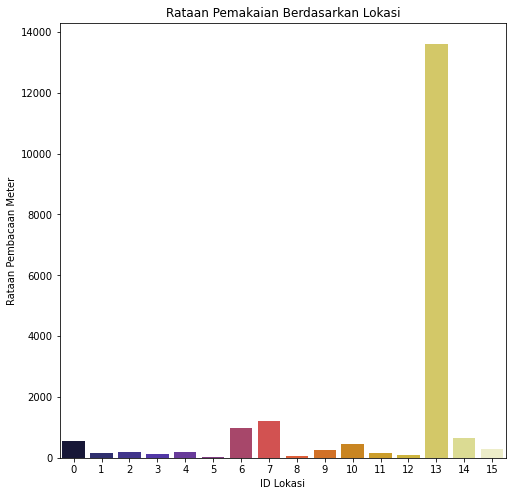

In [62]:
# Melihat Penggunaan Daya Berdasarkan ID lokasi

plt.figure(figsize=(8,8))
site_df= df_all_Train.groupby(['site_id']).meter_reading.mean().reset_index()
sns.barplot(x=site_df['site_id'], y=site_df['meter_reading'], palette='CMRmap')
plt.ylabel("Rataan Pembacaan Meter")
plt.xlabel("ID Lokasi")
plt.title("Rataan Pemakaian Berdasarkan Lokasi")
plt.show()

Berdasarkan diagram diatas, dapat dilihat bahwa:
* Lokasi dengan ID 13 mencatat penggunaan daya rata-rata tertinggi, dan diikuti oleh lokasi dengan ID 7 dan lokasi dengan ID 6.
* Penggunaan daya terendah dicatat oleh Lokasi dengan ID 5.
* Pada data di lokasi ID 13 diasumsikan kemungkinan adanya outlier (harus dilihat lebih lanjut lewat exploratori berikutnya)

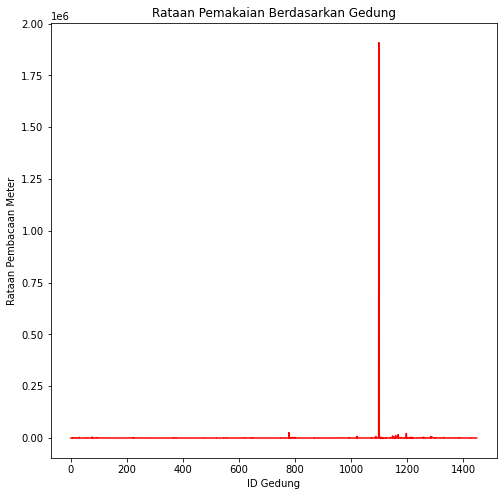

In [63]:
# Melihat Penggunaan Daya Berdasarkan ID Gedung

plt.figure(figsize=(8,8))
site_df= df_all_Train.groupby(['building_id']).meter_reading.mean().reset_index()
sns.lineplot(x=site_df['building_id'], y=site_df['meter_reading'], color='red')
plt.ylabel("Rataan Pembacaan Meter")
plt.xlabel("ID Gedung")
plt.title("Rataan Pemakaian Berdasarkan Gedung")
plt.show()

In [64]:
print(df_all_Train[df_all_Train.meter_reading == df_all_Train.meter_reading.max()])

         building_id  meter            timestamp  meter_reading  site_id  \
8907488         1099      2  2016-06-13 09:00:00     21904700.0       13   

        primary_use  square_feet  year_built  floor_count  air_temperature  \
8907488   Education       332884         NaN          NaN         19.40625   

         cloud_coverage  dew_temperature  precip_depth_1_hr  \
8907488             NaN        17.203125                0.0   

         sea_level_pressure  wind_direction  wind_speed  
8907488              1014.5            50.0    6.199219  


Seperti yang dapat kita lihat dari plot di atas, pembacaan meter bervariasi di seluruh bangunan. **Bangunan dengan ID 1099** memiliki lonjakan penggunaan daya yang besar dalam penggunaannya, sementara banyak bangunan menggunakan energi yang sangat sedikit. Hal itu akan dianggap sebagai **outlier.**

Karena dianggap sebagai **outlier** maka pembacaan meter di bangunan dengan ID 1099 akan di hapus, kemudian setelah itu akan dilihat data selanjutnya apakah masih memiliki **outlier atau tidak.**

In [65]:
# Fungsi Plotting/tampil grafik distribusi dari tiap kolom pada dataframe

sns.set_theme()

def tampil_grafik_distribusi(dataframe, column_name):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.distplot(dataframe[column_name], color='blue', ax = ax).set_title("Grafik Distribusi untuk {}".format(column_name), fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.show()

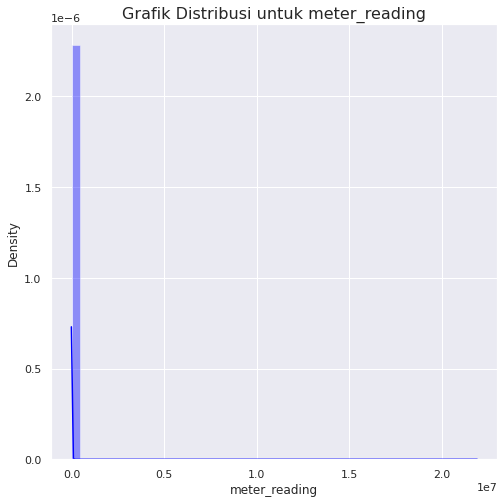

In [66]:
tampil_grafik_distribusi(df_all_Train,'meter_reading')

In [67]:
# Melakukan transformasi log terhadap data di kolom meter_reading pada data train

df_all_Train['meter_reading']=np.log1p(df_all_Train['meter_reading'])

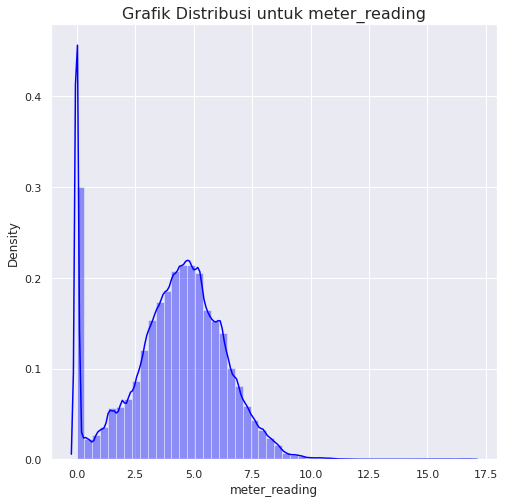

In [68]:
tampil_grafik_distribusi(df_all_Train,'meter_reading')

In [69]:
# Melihat deskripsi data dan grafik dari data meter_reading setelah transformasi log

df_all_Train['meter_reading'].describe()

count    2.021610e+07
mean     4.208398e+00
std      2.074255e+00
min      0.000000e+00
25%      2.960105e+00
50%      4.379210e+00
75%      5.594652e+00
max      1.690221e+01
Name: meter_reading, dtype: float64

In [70]:
# Untuk analisa lebih lanjut, maka kita akan memberikan nama dari tiap kategori dari meter_id, dimana {0: listrik, 1: air dingin, 2: uap, 3: air panas}

df_all_Train['meter'].replace({0: 'Listrik', 1: 'Air Dingin', 2: 'Uap', 3: 'Air Panas'}, inplace=True)

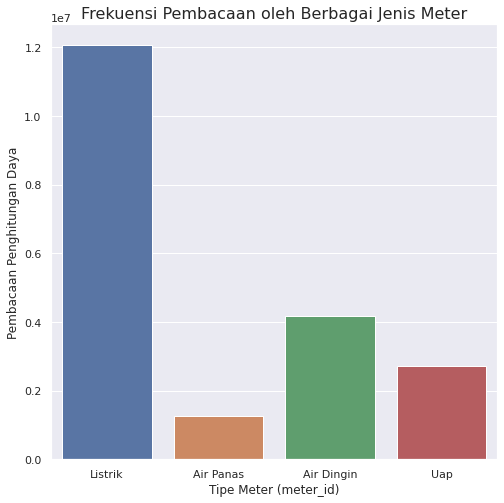

In [71]:
# Melakukan Plot frekuensi penggunaan daya (Pembacaan Meter) dan juga Rataan penggunaan daya (Pembacaan Meter) dengan nama meter_id yang sudah diubah

# 1. Plot Frekuensi Penggunaan Daya (Pembacaan Meter)

plt.figure(figsize=(8,8))
sns.countplot(x = 'meter', data = df_all_Train).set_title("Frekuensi Pembacaan oleh Berbagai Jenis Meter", fontsize=16)
plt.xlabel('Tipe Meter (meter_id)', fontsize=12)
plt.ylabel('Pembacaan Penghitungan Daya', fontsize=12)
plt.show()

Dari plot 1 di atas, frekuensi penggunaan daya berdasarkan meter_id penggunaan listrik memiliki pembacaan meter **paling banyak digunakan oleh Listrik,** diikuti oleh air dingin dan uap. Sedangkan **Pembacaan terendah adalah untuk air panas.**

Text(0.5, 1.0, 'Rata-rata Pembacaan oleh Berbagai Jenis Meter')

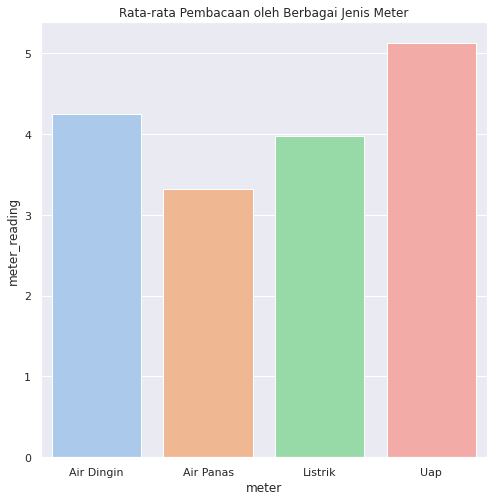

In [72]:
# 2. Plot Rata-Rata Penggunaan Daya (Pembacaan Meter)

plt.figure(figsize=(8,8))
meter_df= df_all_Train.groupby('meter').meter_reading.mean().reset_index()
ax= sns.barplot(x='meter', y='meter_reading', data=meter_df, palette='pastel')
plt.title("Rata-rata Pembacaan oleh Berbagai Jenis Meter")

Dari plot 2 di atas, Rataan penggunaan daya **Uap adalah yang paling boros daya** dan **air panas adalah yang paling hemat daya.**

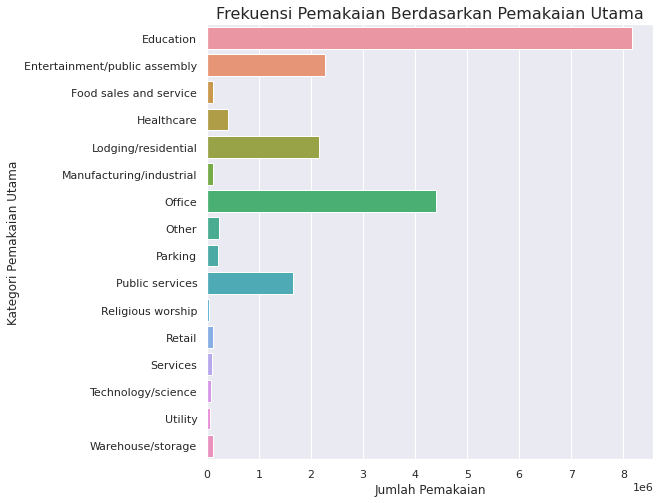

In [73]:
# 3. Pengamatan Penggunaan Daya Berdasarkan Pemakaian Utama (primary_use)

plt.figure(figsize=(8,8))
sns.countplot(y = 'primary_use', data = df_all_Train).set_title("Frekuensi Pemakaian Berdasarkan Pemakaian Utama", fontsize=16)
plt.ylabel('Kategori Pemakaian Utama', fontsize=12)
plt.xlabel('Jumlah Pemakaian', fontsize=12)
plt.show()

Dari Plot di atas terlihat bahwa penggunaan daya (pembacaan meter) **paling besar oleh lembaga pendidikan**, diikuti oleh kantor, hiburan dan bangunan Penginapan/perumahan.


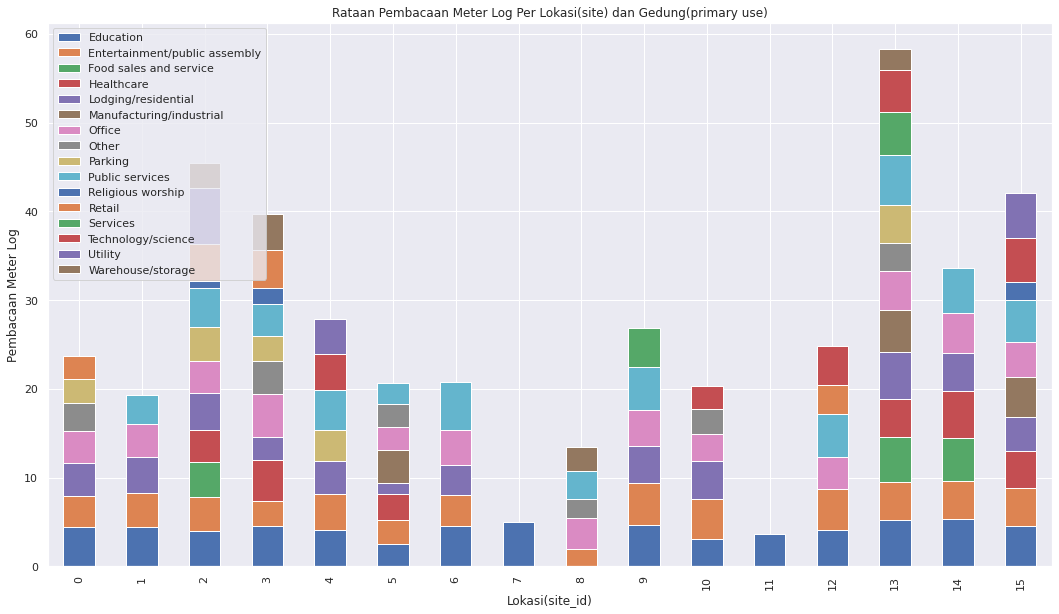

In [74]:
# 4. Pengamatan Penggunaan Daya Tiap Gedung (primary_use) Berdasarkan Lokasi (site_id)

site_use_grouping = df_all_Train.groupby(['site_id','primary_use'])['meter_reading'].mean().unstack('primary_use')
site_use_grouping.plot(kind = 'bar', stacked = True, figsize=(18,10)).set_title("Rataan Pembacaan Meter Log Per Lokasi(site) dan Gedung(primary use)")
plt.xlabel('Lokasi(site_id)')
plt.ylabel('Pembacaan Meter Log')
plt.legend(loc = "upper left")
plt.show()

Dari diagram diatas, diperoleh bahwa:
* Lokasi ke-13 memiliki pembacaan meter rata-rata tertinggi yang terdiri dari beberapa bangunan.
* Lokasi ke-11 memiliki pembacaan meter rata-rata paling rendah dan bangunan di lokasi ini hanya lembaga pendidikan

**6. Melihat Missing Value pada fitur/variabel data frame**

In [75]:
missing_values = pd.DataFrame(df_all_Train.isnull().sum() * 100 / len(df_all_Train))
missing_values.columns = ["Missing Values"]

missing_values = missing_values[missing_values["Missing Values"] != 0]
missing_values.sort_values(by = "Missing Values", axis = 0, ascending = False, inplace = True)

missing_values

,Missing Values
floor_count,82.652772
year_built,59.990033
cloud_coverage,43.655131
precip_depth_1_hr,18.544739
wind_direction,7.167792
sea_level_pressure,6.092515
wind_speed,0.710701
dew_temperature,0.495348
air_temperature,0.478124


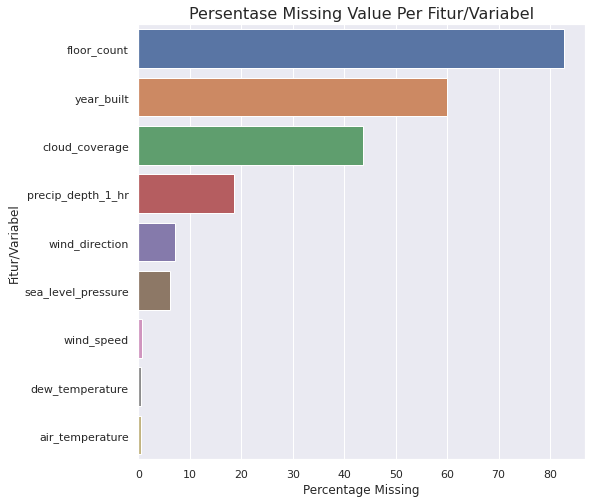

In [76]:
plt.figure(figsize=(8,8))
sns.barplot(x = missing_values['Missing Values'], y = missing_values.index).set_title("Persentase Missing Value Per Fitur/Variabel", fontsize=16)
plt.xlabel('Percentage Missing', fontsize=12)
plt.ylabel('Fitur/Variabel', fontsize=12)
plt.show()

Fitur/variabel **Banyak Lantai (floor_count) dan tahun pembuatan (year_built) memiliki missing value lebih dari 50%**, oleh karena itu nantinya variabel ini akan kita **hapus**, sedangkan untuk **fitur/variabel lainnya akan dilakukan imputasi dengan mengisi data yang kosong dengan median tiap fitur/variabel.**

In [77]:
target_corr_df = pd.DataFrame(df_all_Train.corr()["meter_reading"].sort_values(ascending=False))
target_corr_df

,meter_reading
meter_reading,1.000000
square_feet,0.366016
floor_count,0.342052
site_id,0.139902
building_id,0.126395
year_built,0.103332
dew_temperature,0.008358
precip_depth_1_hr,0.002923
air_temperature,-0.004704
sea_level_pressure,-0.008521


Terlihat bahwa **tidak ada korelasi yang cukup kuat antara pembacaan meter (meter_reading) dengan fitur/variabel lainnya.**

**7. Treatment terhadap outlier**

Berdasarkan plot rataan pembacaan daya berdasarkan ID gedung sebelumnya, bahwa pada gedung dengan ID 1099 pembacaan daya sangat tinggi, dan hal ini kita anggap sebagai outlier

In [78]:
# Informasi Statistika Dasar pada Gedung ID 1099

df_all_Train[df_all_Train['building_id']==1099]['meter_reading'].describe()

count    17566.000000
mean         8.564197
std          3.608276
min          4.976734
25%          6.256500
50%          6.894363
75%          8.854950
max         16.902212
Name: meter_reading, dtype: float64

In [79]:
# Menghapus Data Pengamatan untuk ID Bangunan 1099

drop_indices= list(df_all_Train[df_all_Train['building_id']==1099].index)
df_all_Train.drop(drop_indices, axis=0, inplace=True)

In [80]:
# Mengamati apakah masih ada outlier lain pada pembacaan meter (meter_reading) dengan melihat pembacaan terbesar lainnya

print(df_all_Train[df_all_Train.meter_reading == df_all_Train.meter_reading.max()])

          building_id       meter            timestamp  meter_reading  \
13851463          778  Air Dingin  2016-09-09 17:00:00      13.688104   

          site_id                    primary_use  square_feet  year_built  \
13851463        6  Entertainment/public assembly       108339         NaN   

          floor_count  air_temperature  cloud_coverage  dew_temperature  \
13851463          NaN         33.90625             0.0             20.0   

          precip_depth_1_hr  sea_level_pressure  wind_direction  wind_speed  
13851463                0.0              1014.5             NaN         NaN  


In [81]:
# Dari informasi di atas, terlihat bahwa pembacaan meter Terbesar selanjutnya adalah gedung dengan ID gedung 778
# Informasi deskripsi datanya sebagai berikut

df_all_Train[df_all_Train['building_id']==778]['meter_reading'].describe()

count    16860.000000
mean         3.487550
std          3.450661
min          0.000000
25%          0.000000
50%          5.066700
75%          5.585844
max         13.688104
Name: meter_reading, dtype: float64

In [82]:
# jika dibandingkan dengan plot awal, sepertinya gedung dengan ID 778 juga termasuk Outlier, sehingga akan dihapus kembali

drop_indices= list(df_all_Train[df_all_Train['building_id']==778].index)
df_all_Train.drop(drop_indices, axis=0, inplace=True)

In [83]:
# Mengamati kembali apakah masih ada outlier lain pada pembacaan meter (meter_reading) dengan melihat pembacaan terbesar lainnya

print(df_all_Train[df_all_Train.meter_reading == df_all_Train.meter_reading.max()])

          building_id       meter            timestamp  meter_reading  \
14679956         1088  Air Dingin  2016-09-24 09:00:00      12.784485   

          site_id primary_use  square_feet  year_built  floor_count  \
14679956       13   Education       287594         NaN          NaN   

          air_temperature  cloud_coverage  dew_temperature  precip_depth_1_hr  \
14679956        18.296875             NaN         16.09375                0.0   

          sea_level_pressure  wind_direction  wind_speed  
14679956              1019.0           140.0    4.101562  


In [84]:
# Dari informasi di atas, terlihat bahwa pembacaan meter Terbesar selanjutnya adalah gedung dengan ID gedung 1088
# Informasi deskripsi datanya sebagai berikut

df_all_Train[df_all_Train['building_id']==1088]['meter_reading'].describe()

count    26336.000000
mean         7.604514
std          1.825624
min          0.000000
25%          6.488064
50%          7.965938
75%          8.781313
max         12.784485
Name: meter_reading, dtype: float64

Dari pengamatan sebelumnya penggunaan daya dari bangunan edukasi memang besar. Sehingga Data pada ID gedung 1088 diasumsikan **bukan outlier** karena bangunan tersebut merupakan bangunan edukasi.

**8. Menghapus baris dengan pembacaan nol meter karena dapat menunjukkan pembacaan yang tidak akurat atau tidak tersedia.**

In [87]:
pembacaan_meter_nol = list(df_all_Train[df_all_Train['meter_reading'] == 0].index)
df_all_Train.drop(pembacaan_meter_nol, axis = 0, inplace = True)

In [88]:
print('Bentuk Baru dari Data Train:',df_all_Train.shape)

Bentuk Baru dari Data Train: (18314942, 14)


**9. Menghapus kolom/fitur/variabel dengan missing-value lebih dari 50%**

In [89]:
threshold = len(df_all_Train) * 0.5
df_all_Train.dropna(axis=1, thresh = threshold, inplace = True)

In [90]:
print('Bentuk Baru dari Data Train:',df_all_Train.shape)

Bentuk Baru dari Data Train: (18314942, 14)


**10. Mengisi nilai yang hilang menggunakan median dari kolom/fitur/variabel.**

* Untuk mengetahui metode yang tepat dalam missing value, maka akan dilihat terlebih dahulu deskripsi dari masing-masing fitur/variabel yang memiliki missing value terlebih dahulu.
* Setelah kita hapus floor_count dan year_built, maka fitur/variabel yang masih memiliki missing value adalah = cloud_coverage,precip_depth_1_hr, wind_direction, sea_level_pressure, wind_speed, dew_temperature, dan air_temperature

In [91]:
fitur_missing_value = ['cloud_coverage','precip_depth_1_hr', 'wind_direction', 'sea_level_pressure', 'wind_speed', 'dew_temperature', 'air_temperature']
df_all_Train[fitur_missing_value].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cloud_coverage,10351087.0,NaN,0.0,0.00000,0.000000,0.000000,4.000000,9.00000
precip_depth_1_hr,14793084.0,NaN,NaN,-1.00000,0.000000,0.000000,0.000000,343.00000
wind_direction,16990067.0,NaN,NaN,0.00000,70.000000,180.000000,280.000000,360.00000
sea_level_pressure,17127556.0,NaN,NaN,968.00000,1011.500000,1016.000000,1020.500000,1046.00000
wind_speed,18182415.0,NaN,0.0,0.00000,2.099609,3.099609,4.601562,19.00000
dew_temperature,18222416.0,NaN,0.0,-35.00000,0.600098,8.898438,16.093750,26.09375
air_temperature,18225511.0,NaN,0.0,-28.90625,8.898438,16.703125,24.296875,47.18750


In [92]:
# Karena Meannya berupa NaN, maka missing value yang akan dilakukan adalah dengan mengimputasinya dengan nilai Median

df_all_Train['cloud_coverage'].fillna(df_all_Train['cloud_coverage'].median(), inplace=True)
df_all_Train['sea_level_pressure'].fillna(df_all_Train['sea_level_pressure'].median(), inplace=True)
df_all_Train['precip_depth_1_hr'].fillna(df_all_Train['precip_depth_1_hr'].median(), inplace=True)
df_all_Train['wind_direction'].fillna(df_all_Train['wind_direction'].median(), inplace=True)
df_all_Train['wind_speed'].fillna(df_all_Train['wind_speed'].median(), inplace=True)
df_all_Train['dew_temperature'].fillna(df_all_Train['dew_temperature'].median(), inplace=True)
df_all_Train['air_temperature'].fillna(df_all_Train['air_temperature'].median(), inplace=True)

In [93]:
# Cek Missing Value setelah dilakukan imputasi data

df_all_Train.isnull().sum() / len(df_all_Train)

building_id           0.0
meter                 0.0
timestamp             0.0
meter_reading         0.0
site_id               0.0
primary_use           0.0
square_feet           0.0
air_temperature       0.0
cloud_coverage        0.0
dew_temperature       0.0
precip_depth_1_hr     0.0
sea_level_pressure    0.0
wind_direction        0.0
wind_speed            0.0
dtype: float64

Setelah dilakukan imputasi data dengan nilai mediannya, terlihat bahwa data tersebut **sudah tidak memiliki missing value.**

In [94]:
# Informasi data Train terbaru

df_all_Train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18314942 entries, 45 to 20216099
Data columns (total 14 columns):
 #   Column              Dtype   
---  ------              -----   
 0   building_id         int16   
 1   meter               object  
 2   timestamp           category
 3   meter_reading       float32 
 4   site_id             int8    
 5   primary_use         category
 6   square_feet         int32   
 7   air_temperature     float16 
 8   cloud_coverage      float16 
 9   dew_temperature     float16 
 10  precip_depth_1_hr   float16 
 11  sea_level_pressure  float16 
 12  wind_direction      float16 
 13  wind_speed          float16 
dtypes: category(2), float16(7), float32(1), int16(1), int32(1), int8(1), object(1)
memory usage: 768.8+ MB


Text(0.5, 1.0, 'Matriks Korelasi')

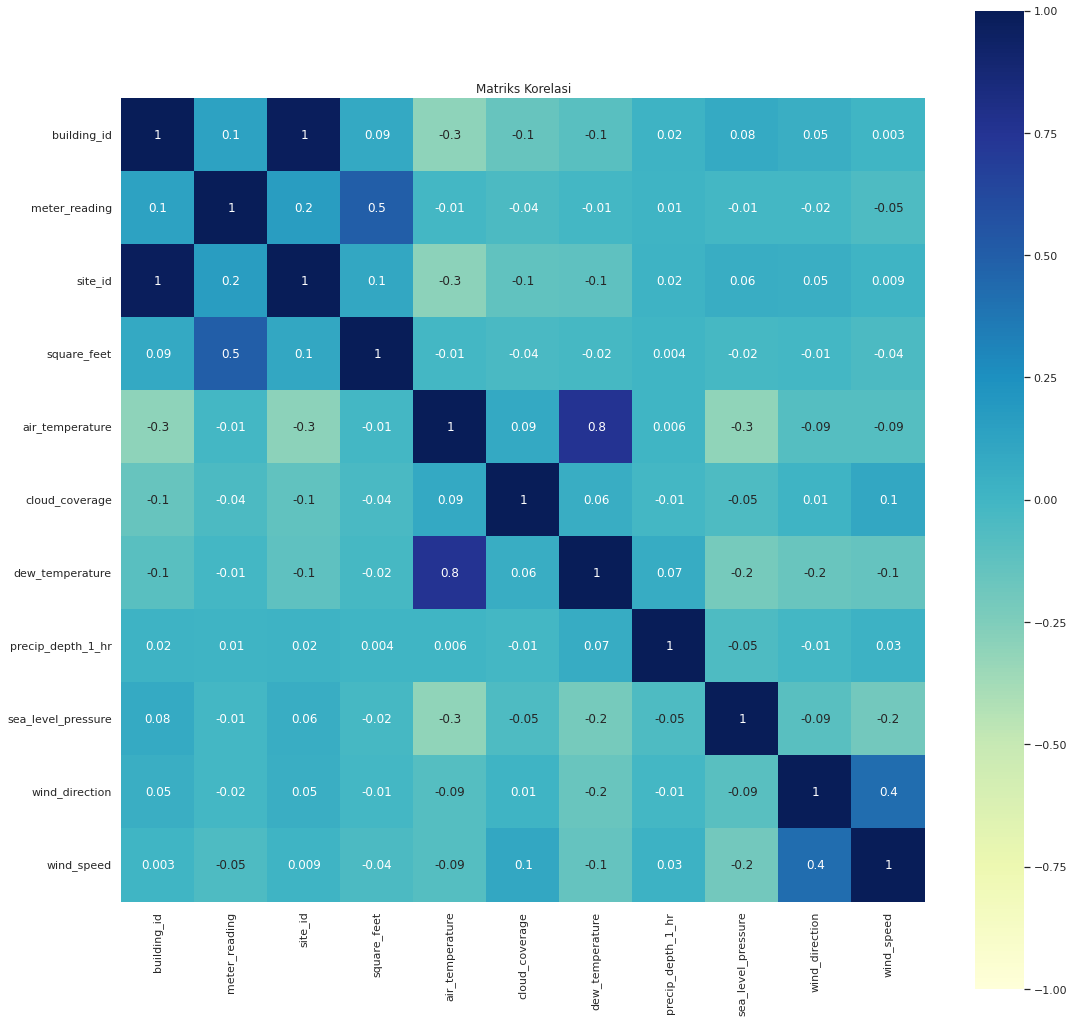

In [95]:
# Cek Matriks Korelasi

plt.figure(figsize=(18,18))
sns.heatmap(df_all_Train.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, square=True, cmap='YlGnBu')
plt.title('Matriks Korelasi')

In [96]:
df_all_Train.to_csv('Data Hasil Pre Processing Tugas Proyek UTS EVDA.csv', index=False)